In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("comments_art-et-culture.csv")
df.head()

Unnamed: 0                            postId  \
0           0  f06aa998054e11eba66e646e69d991ea   
1           1  f06aa998054e11eba66e646e69d991ea   
2           2  f06aa998054e11eba66e646e69d991ea   
3           3  f06aa998054e11eba66e646e69d991ea   
4           4  f1cf1b9c054e11ebb718646e69d991ea   

                                             comment  score           topic  
0  علينا الاهتمام ببيت الابحاث العلمية و المختبرا...     -9  art-et-culture  
1  بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أ...      5  art-et-culture  
2  مبادرات مهمة يقوم بها بيت الشعر لصون الذاكرة ا...      4  art-et-culture  
3  شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاع...      5  art-et-culture  
4  كل من عليها فان ويبقى وجه ربك ذو الجلال والإكر...     13  art-et-culture

In [3]:
df.tail()

Unnamed: 0                            postId  \
10563       10563  9b547968055311ebb870646e69d991ea   
10564       10564  9b547968055311ebb870646e69d991ea   
10565       10565  9b547968055311ebb870646e69d991ea   
10566       10566  9b547968055311ebb870646e69d991ea   
10567       10567  9b547968055311ebb870646e69d991ea   

                                                 comment  score  \
10563  نريد معرضا تشكيليا للرجل ايضا يخص الظلم و الحي...      5   
10564  هل يسمح لنا المنبر برسم كلمة اتمنى ان تكون قصي...      6   
10565  في حين ان الرجل تجاوزقرون مضت المنظور الانتمائ...      7   
10566  من كان يخرج للصيد حيوانات مفترسة في العهد القد...      7   
10567  رجاء ،!! مارتيل تطوان تنتظرك لترسمي معانات الم...      0   

                topic  
10563  art-et-culture  
10564  art-et-culture  
10565  art-et-culture  
10566  art-et-culture  
10567  art-et-culture

In [4]:
df.describe().T

count         mean          std    min      25%     50%  \
Unnamed: 0  10568.0  5283.500000  3050.863157    0.0  2641.75  5283.5   
score       10568.0    17.249432    58.120990 -779.0     1.00     6.0   

                75%      max  
Unnamed: 0  7925.25  10567.0  
score         18.00   1240.0

In [5]:
def box_plots(df, cols_lst):
    # boxplot all the numerical columns and see if there any outliers
    for i in cols_lst:
        df.iloc[:, 1:].boxplot(column=i)
        plt.title(f"Box Plot Of {i}" , fontsize=20, color="orange")
        plt.savefig(f'{i}.png', facecolor='w', bbox_inches="tight", pad_inches=0.3, transparent=False)
        plt.show()

In [6]:
list(df.columns)

['Unnamed: 0', 'postId', 'comment', 'score', 'topic']

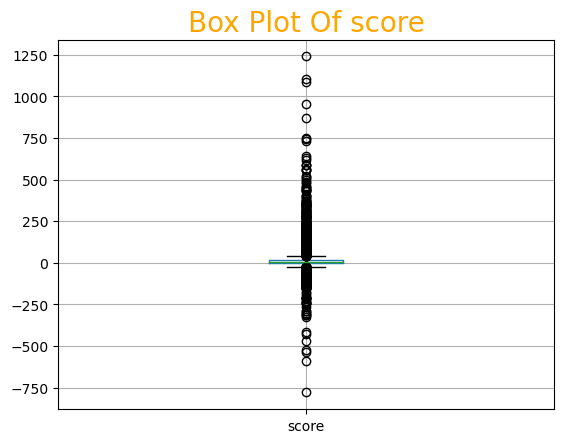

In [7]:
box_plots(df, ['score'])

In [8]:
df.corr()

Unnamed: 0     score
Unnamed: 0    1.000000 -0.000231
score        -0.000231  1.000000

In [9]:
df["postId"].value_counts()

729a80ae055011eb95d8646e69d991ea    201
41ba1ac8054f11eb8e67646e69d991ea    154
786e1740054f11ebac3d646e69d991ea    152
ef55407a054f11ebbf8c646e69d991ea    150
bbec0bf0055011eb9a29646e69d991ea    143
                                   ... 
6800aecc054f11eb8fac646e69d991ea      1
1cc3d91e055011eb97df646e69d991ea      1
6c20d280054f11eba03b646e69d991ea      1
6d566d48054f11eb8d1f646e69d991ea      1
16c9f540055111eba93f646e69d991ea      1
Name: postId, Length: 854, dtype: int64

In [10]:
def bar_plot(input_dict):
    # plot variance accounted for by each principal component.
    fig, ax = plt.subplots(figsize = (14,8))

    df = pd.DataFrame(input_dict, index=[0])

    # Plot the feature weights as a function of the components
    df.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("repititions")
    ax.set_xlabel("Feature Names")

In [11]:
score = dict(zip(list(df["score"].unique())[:10], list(df["score"].value_counts())[:10]))

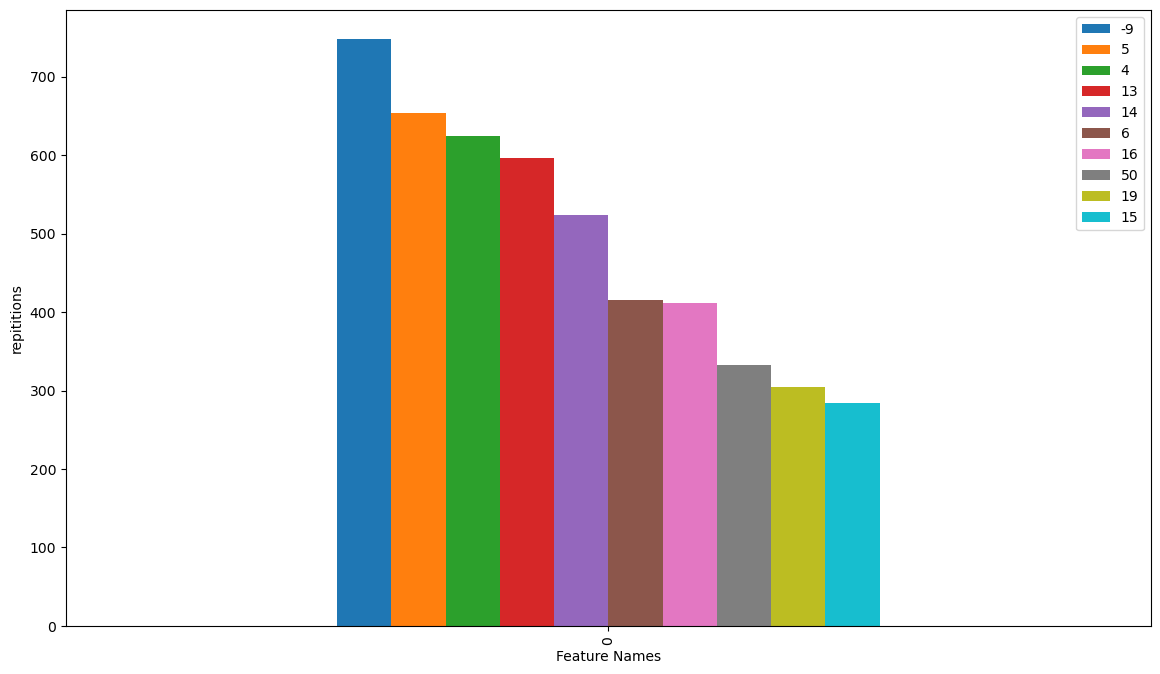

In [12]:
bar_plot(score)

In [13]:
len(df["postId"].unique())

854

In [14]:
df["topic"].unique()

array(['art-et-culture'], dtype=object)

In [15]:
df = df.drop(['topic'], axis=1)

In [16]:
df.dtypes

Unnamed: 0     int64
postId        object
comment       object
score          int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10568 entries, 0 to 10567
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10568 non-null  int64 
 1   postId      10568 non-null  object
 2   comment     10568 non-null  object
 3   score       10568 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 330.4+ KB


In [18]:
df.shape

(10568, 4)

In [19]:
df.dtypes

Unnamed: 0     int64
postId        object
comment       object
score          int64
dtype: object

In [20]:
for i in df["comment"][:5]:
    print(i)

علينا الاهتمام ببيت الابحاث العلمية و المختبرات، بماذا نفعنا الشعر و الغناء سوى التفاهة و تضييع الوقت
بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أرض الوطن لما يسديه للشعر نصوصًا ودراسات وأنشطة في منتهى الجدية... لا نعرف ما إذا كانت منشوراته قد حظيت بالدعم هذه السنة، ولا نعرف ما إذا كان الوزير الجديد يعرف عن هذا البيت وعن قيمته الاعتبارية التي جعلت اليونيسكو تُحدث يوما عالميّا للشعر باقتراح منه. أما صباح الزيداني، فهي الآن وحدها سرب، وكان أولى بالوزارة أن تمكنها من أسباب التحليق...
شكرًا لمراد والذين معه.
مبادرات مهمة يقوم بها بيت الشعر لصون الذاكرة الثقافية ببلادنا
شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاعر مراد في الدفاع عن الرموز الثقافية المغربية وجعل الثقافة في صلب القضايا والاهتمامات الإنسانية
كل من عليها فان ويبقى وجه ربك ذو الجلال والإكرام.... ميزانية هذه السينما يجب ان توزع على البحث العلمي و ليس على الفنانين، نشكر فيروس كرونا على تنوير الرأي العام


In [21]:
def num_per_class(df, class_col):
    num_of_data_per_calss = {}
    total = 0
    for cls in df[class_col].unique():
        counter = 0
        for cls_ in df[class_col]:
            if cls == cls_:
                counter += 1
        total += counter
        num_of_data_per_calss[cls] = counter
    return num_of_data_per_calss, total

In [22]:
len(df["score"].unique())

458

In [23]:
df["score"].unique()[:10]

array([-9,  5,  4, 13, 14,  6, 16, 50, 19, 15], dtype=int64)

In [24]:
num_of_data_per_calss, all_data = num_per_class(df, "postId")

In [25]:
import itertools

print(f"number of examples per class:\n\n")
for k in dict(itertools.islice(num_of_data_per_calss.items(), 10)):
    print(f"{k}: {num_of_data_per_calss[k]}")

number of examples per class:


f06aa998054e11eba66e646e69d991ea: 4
f1cf1b9c054e11ebb718646e69d991ea: 4
f2d282a4054e11eb800f646e69d991ea: 10
f3f46cac054e11eba403646e69d991ea: 2
f50f0476054e11eba31b646e69d991ea: 29
f65659e4054e11eb83ba646e69d991ea: 43
f7672d94054e11ebb2be646e69d991ea: 22
f898201e054e11ebac29646e69d991ea: 3
fb360634054e11eb8cd5646e69d991ea: 75
fc97cdba054e11eba4cd646e69d991ea: 139


In [26]:
num_of_data_per_score, all_data = num_per_class(df, "score")

In [27]:
# sorting the dictionary
sorted_num_of_data_per_calss = sorted(num_of_data_per_calss.items(), key = lambda x:x[1])

In [28]:
sorted_data = []
sorted_data.extend(sorted_num_of_data_per_calss[:5])
sorted_data.extend(sorted_num_of_data_per_calss[-5:])

In [29]:
sorted_num_of_data_per_calss_dic = dict(sorted_data)

In [30]:
max_sorted_num_of_data_per_calss = dict(sorted_num_of_data_per_calss[-10:])

In [31]:
max_sorted_num_of_data_per_calss

{'56aa8ef4054f11eb9eac646e69d991ea': 128,
 '4b50cb10055111eb9636646e69d991ea': 128,
 'b5d462a4055011ebab4a646e69d991ea': 134,
 'fc97cdba054e11eba4cd646e69d991ea': 139,
 'bbec0bf0055011eb9a29646e69d991ea': 143,
 'c36588c8055011ebb37d646e69d991ea': 143,
 'ef55407a054f11ebbf8c646e69d991ea': 150,
 '786e1740054f11ebac3d646e69d991ea': 152,
 '41ba1ac8054f11eb8e67646e69d991ea': 154,
 '729a80ae055011eb95d8646e69d991ea': 201}

In [32]:
sorted_num_of_data_per_calss_dic

{'0224c130054f11eb8f5e646e69d991ea': 1,
 '0d411302054f11eb868b646e69d991ea': 1,
 '155b6448054f11ebace5646e69d991ea': 1,
 '166fe538054f11eb876e646e69d991ea': 1,
 '176fa2e8054f11eb8778646e69d991ea': 1,
 'c36588c8055011ebb37d646e69d991ea': 143,
 'ef55407a054f11ebbf8c646e69d991ea': 150,
 '786e1740054f11ebac3d646e69d991ea': 152,
 '41ba1ac8054f11eb8e67646e69d991ea': 154,
 '729a80ae055011eb95d8646e69d991ea': 201}

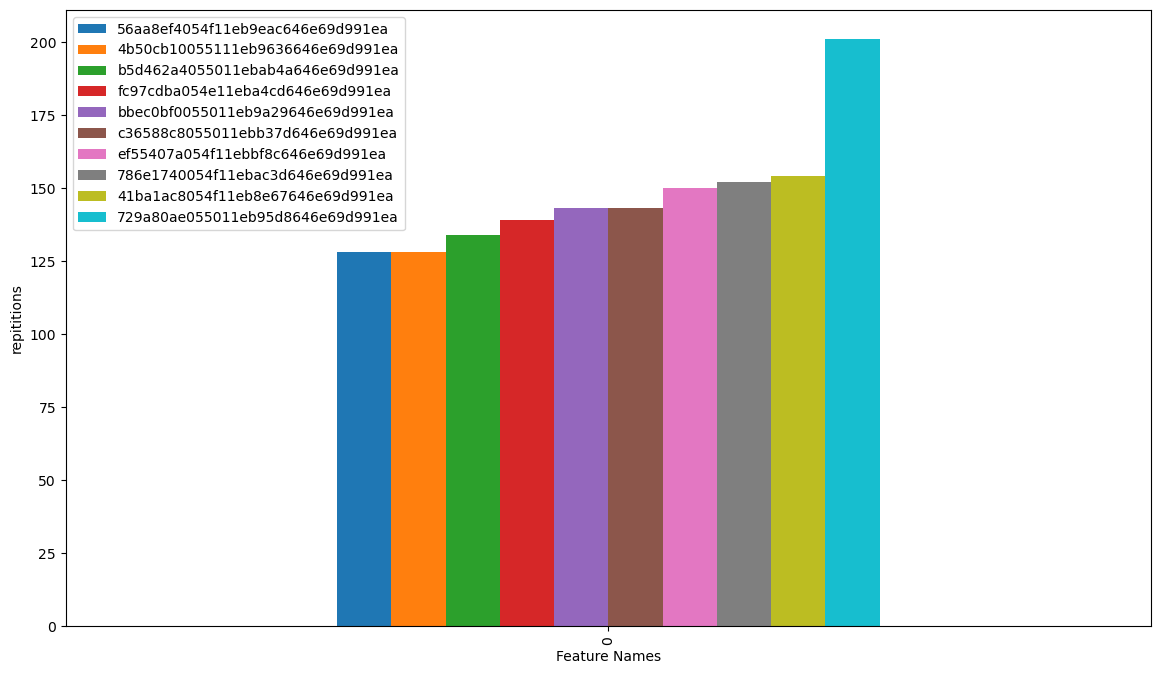

In [33]:
bar_plot(max_sorted_num_of_data_per_calss)

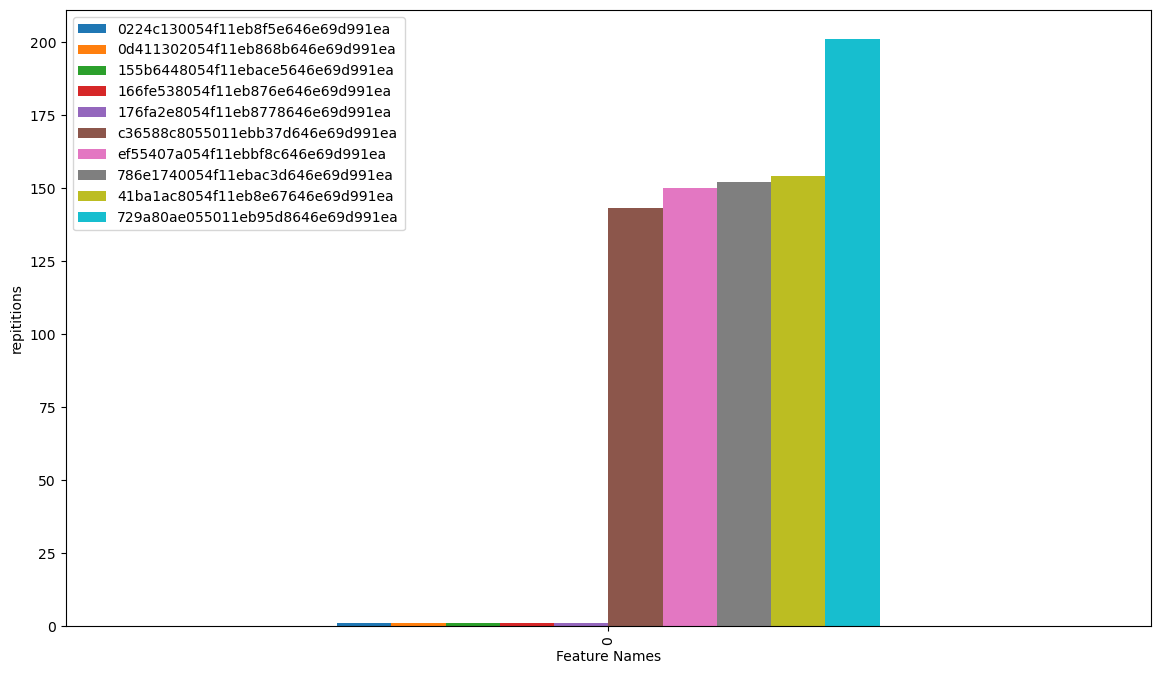

In [34]:
bar_plot(sorted_num_of_data_per_calss_dic)

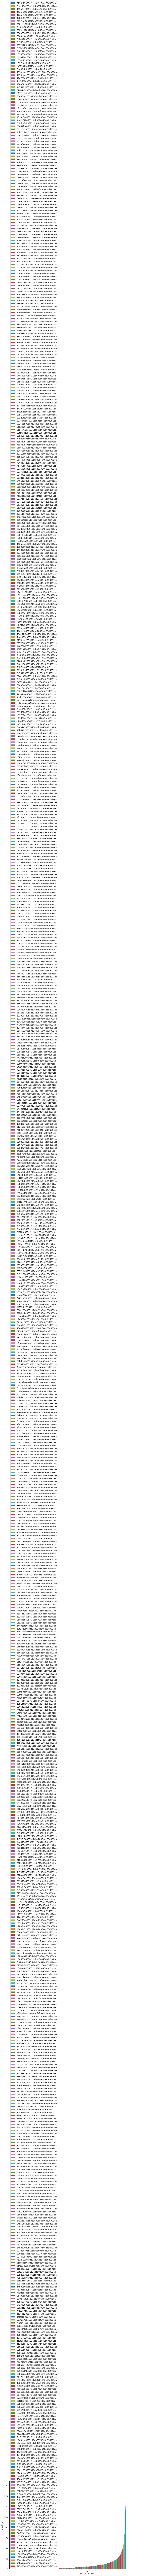

In [35]:
bar_plot(dict(sorted_num_of_data_per_calss))

In [36]:
df.isnull().sum().sum()

0

In [37]:
df.notnull().sum().sum() == df.shape[0] * df.shape[1]

True

In [38]:
df.columns

Index(['Unnamed: 0', 'postId', 'comment', 'score'], dtype='object')

In [39]:
for col in df.columns:
    print(f"Number of NaN values in column: {col} = {df[col].isnull().sum()}")

Number of NaN values in column: Unnamed: 0 = 0
Number of NaN values in column: postId = 0
Number of NaN values in column: comment = 0
Number of NaN values in column: score = 0


In [40]:
all_data

10568

In [41]:
all_data == df.shape[0]

True

In [42]:
from nltk.util import ngrams
from collections import Counter


def most_frequent_general_ngrams(df, data_col, n):
    all_data_ngrams = []
    for text in df[data_col]:
        ngram_counts = Counter(ngrams(text.split(), n))
        all_data_ngrams.append(ngram_counts.most_common(1))
    return all_data_ngrams

In [43]:
bigram = most_frequent_general_ngrams(df, "comment", 2)

In [44]:
for val in bigram[:5]:
    print(val)

[(('علينا', 'الاهتمام'), 1)]
[(('نعرف', 'ما'), 2)]
[(('مبادرات', 'مهمة'), 1)]
[(('شكرا', 'لمكتب'), 1)]
[(('كل', 'من'), 1)]


In [45]:
trigram = most_frequent_general_ngrams(df, "comment", 3)

In [46]:
for val in trigram[:5]:
    print(val)

[(('علينا', 'الاهتمام', 'ببيت'), 1)]
[(('نعرف', 'ما', 'إذا'), 2)]
[(('مبادرات', 'مهمة', 'يقوم'), 1)]
[(('شكرا', 'لمكتب', 'بيت'), 1)]
[(('كل', 'من', 'عليها'), 1)]


In [47]:
quadgram = most_frequent_general_ngrams(df, "comment", 4)

In [48]:
for val in quadgram[:5]:
    print(val)

[(('علينا', 'الاهتمام', 'ببيت', 'الابحاث'), 1)]
[(('بيت', 'الشعر', 'في', 'المغرب'), 1)]
[(('مبادرات', 'مهمة', 'يقوم', 'بها'), 1)]
[(('شكرا', 'لمكتب', 'بيت', 'الشعر'), 1)]
[(('كل', 'من', 'عليها', 'فان'), 1)]


In [49]:
tengram = most_frequent_general_ngrams(df, "comment", 10)

In [50]:
for val in tengram[:5]:
    print(val)

[(('علينا', 'الاهتمام', 'ببيت', 'الابحاث', 'العلمية', 'و', 'المختبرات،', 'بماذا', 'نفعنا', 'الشعر'), 1)]
[(('بيت', 'الشعر', 'في', 'المغرب', 'يحظى', 'بالتقدير', 'داخل', 'وخارج', 'أرض', 'الوطن'), 1)]
[(('مبادرات', 'مهمة', 'يقوم', 'بها', 'بيت', 'الشعر', 'لصون', 'الذاكرة', 'الثقافية', 'ببلادنا'), 1)]
[(('شكرا', 'لمكتب', 'بيت', 'الشعر', 'في', 'المغرب', 'وعلى', 'رأسه', 'الشاعر', 'مراد'), 1)]
[(('كل', 'من', 'عليها', 'فان', 'ويبقى', 'وجه', 'ربك', 'ذو', 'الجلال', 'والإكرام....'), 1)]


In [51]:
def most_frequent_ngrams_per_class(df, cls_col, data_col, match_cls, n):
    all_data_ngrams = []
    for text in df[data_col][df[cls_col]==match_cls]:
        ngram_counts = Counter(ngrams(text.split(), n))
        all_data_ngrams.append(ngram_counts.most_common(1))
    return all_data_ngrams

In [52]:
bigrams = most_frequent_ngrams_per_class(df, "postId", "comment", "f06aa998054e11eba66e646e69d991ea", 2)

In [53]:
for val in bigrams[:5]:
    print(val)

[(('علينا', 'الاهتمام'), 1)]
[(('نعرف', 'ما'), 2)]
[(('مبادرات', 'مهمة'), 1)]
[(('شكرا', 'لمكتب'), 1)]


In [54]:
trigrams = most_frequent_ngrams_per_class(df, "postId", "comment", "f50f0476054e11eba31b646e69d991ea", 3)

In [55]:
for val in trigrams[:5]:
    print(val)

[(('فضيحة', 'من', 'العيار'), 1)]
[(('حبد', 'لو', 'تم'), 1)]
[(('لولا', 'ضغط', 'الجمهور'), 2)]
[(('بدوري', 'أحيي', 'الفنان'), 1)]
[(('نتمنى', 'أن', 'يتبع'), 1)]


In [56]:
from random import choice


def examples_length(df, cls_col, data_col, flag = "general", length = "letters"):
    example = []
    length_of_text = []
    if flag == "general":
        for index, text in df.iterrows():
            example.append(text[data_col])
            if length == "letters":
                length_of_text.append(len(text[data_col]))
            elif length == "words":
                length_of_text.append(len(text[data_col].split()))

    elif flag == "class":
        match = choice(list(df[cls_col].unique()))
        print(f"class_name: {match}")
        for text in df[data_col][df[cls_col]==match]:
            example.append(text)
            if length == "letters":
                length_of_text.append(len(text))
            elif length == "words":
                length_of_text.append(len(text.split()))
    return example, length_of_text

In [57]:
example, length = examples_length(df, "postId", "comment")

In [58]:
for i in range(5):
    print(example[i], length[i])

علينا الاهتمام ببيت الابحاث العلمية و المختبرات، بماذا نفعنا الشعر و الغناء سوى التفاهة و تضييع الوقت 101
بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أرض الوطن لما يسديه للشعر نصوصًا ودراسات وأنشطة في منتهى الجدية... لا نعرف ما إذا كانت منشوراته قد حظيت بالدعم هذه السنة، ولا نعرف ما إذا كان الوزير الجديد يعرف عن هذا البيت وعن قيمته الاعتبارية التي جعلت اليونيسكو تُحدث يوما عالميّا للشعر باقتراح منه. أما صباح الزيداني، فهي الآن وحدها سرب، وكان أولى بالوزارة أن تمكنها من أسباب التحليق...
شكرًا لمراد والذين معه. 409
مبادرات مهمة يقوم بها بيت الشعر لصون الذاكرة الثقافية ببلادنا 61
شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاعر مراد في الدفاع عن الرموز الثقافية المغربية وجعل الثقافة في صلب القضايا والاهتمامات الإنسانية 140
كل من عليها فان ويبقى وجه ربك ذو الجلال والإكرام.... ميزانية هذه السينما يجب ان توزع على البحث العلمي و ليس على الفنانين، نشكر فيروس كرونا على تنوير الرأي العام 160


In [59]:
length[8]

138

In [60]:
example, length = examples_length(df, "postId", "comment", length = "words")
for i in range(5):
    print(example[i], length[i])

علينا الاهتمام ببيت الابحاث العلمية و المختبرات، بماذا نفعنا الشعر و الغناء سوى التفاهة و تضييع الوقت 17
بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أرض الوطن لما يسديه للشعر نصوصًا ودراسات وأنشطة في منتهى الجدية... لا نعرف ما إذا كانت منشوراته قد حظيت بالدعم هذه السنة، ولا نعرف ما إذا كان الوزير الجديد يعرف عن هذا البيت وعن قيمته الاعتبارية التي جعلت اليونيسكو تُحدث يوما عالميّا للشعر باقتراح منه. أما صباح الزيداني، فهي الآن وحدها سرب، وكان أولى بالوزارة أن تمكنها من أسباب التحليق...
شكرًا لمراد والذين معه. 72
مبادرات مهمة يقوم بها بيت الشعر لصون الذاكرة الثقافية ببلادنا 10
شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاعر مراد في الدفاع عن الرموز الثقافية المغربية وجعل الثقافة في صلب القضايا والاهتمامات الإنسانية 23
كل من عليها فان ويبقى وجه ربك ذو الجلال والإكرام.... ميزانية هذه السينما يجب ان توزع على البحث العلمي و ليس على الفنانين، نشكر فيروس كرونا على تنوير الرأي العام 30


In [61]:
example, length = examples_length(df, "postId", "comment", "class")
for i in range(len(example)):
    print(example[i], length[i])

class_name: e6716bca055111ebb695646e69d991ea
السويد لهم اذا شغف القراءة متل المغاربة اللذي لا يتعدى زمن قراءتهم دقيقتين في السنه 83
اطفال المغاربة مثل أطفال السويد على من تضحكي اطفال المغاربة في مليلة ينتظرون العبور الى الى الضفة الاخرى واطفال السويد يتمتعون بجميع الحقوق مجاني التعليم الصحة و........ لمقارنة . 179


In [62]:
example, length = examples_length(df, "postId", "comment", "class", "words")
for i in range(len(example)):
    print(example[i], length[i])

class_name: f1320fc0055011eb8b86646e69d991ea
الناس تبحث عن طريقة للنجاة بارواحم من هدا الوباء القاتل والعلماء يبحثون ليل نهار عن مخرج . وآخرون يفكرون في أشياء أخرى : أفلام وغيرها..... 25
نتمنى من هذا التوثيق للأستاذ لحو أن يكون في مستوى هذا الحدث التاريخي والعلمي والإنساني والإجتماعي والإقتصادي والسياسي والديني الجلل لتصل حقيقته ودقائق تفاصيله بكل أمانة الى الأجيال القادمة 29
ابن حارس العمارة أتى من اسبانيا.ه‍ههههههه السيناريوهات الدرامية نعيشها يوميا عبر جميع القنوات الرسمية المغربية والفضائيات وعبر الأنترنيت . صوت وصورة. هل هناك اكتر من هدا التوتيق؟ اللهم احفظ بلدنا المملكة المغربية من هذا الوباء. 35
Oui, faire un scénario qui relate ce qu'une pandémie pourrait produire comme gestations sociales et surtout psychologiques est une excellente idée. Toutefois, le temps de sortie d'un pareil projet doit laisser penser à une sorte d'arrivisme scénaristique. Le bon sens veut que la mobilisation des artistes doit se matérialiser par des gestes en faveur de ceux et de celles les plus touchés 